<a href="https://colab.research.google.com/github/denniss83/Turkiye_Enflasyon_ve_Maas_Analizi_-2010-2025-/blob/main/T%C3%BCrkiye_Enflasyon_ve_Maa%C5%9F_Analizi_(2010%E2%80%932025).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##1. Giriş ve Amaç

Bu çalışmada, Türkiye'de 2010–2025 yılları arasında enflasyon (TÜFE) oranları ile asgari ücret gelişimi karşılaştırmalı olarak analiz edilecektir. Amaç, maaş artışlarının enflasyon karşısındaki reel durumunu ortaya koymak ve dönemsel alım gücü değişimlerini incelemektir.

**⚠️ Uyarı: Bu çalışma, Python ile veri analizi becerilerini geliştirmek amacıyla hazırlanmış eğitim amaçlı bir projedir. İçeriğinde yer alan grafikler, tahminler veya veriler hatalı olabilir.**

In [8]:
!pip install pandas matplotlib seaborn requests beautifulsoup4 lxml

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from bs4 import BeautifulSoup
import re

##Tüfe Verileri 2010/2025

In [10]:
from google.colab import files
uploaded = files.upload()

Saving 3.xlsx to 3.xlsx


In [44]:
df = pd.read_excel('3.xlsx')
print(df.head())

  Üretici Fiyatları Endeksi (ÜFE) Üretici Fiyatları Endeksi (ÜFE)_1  \
0                     2024 Yıllık                            %28,52   
1                     2023 Yıllık                            %44,22   
2                     2022 Yıllık                            %97,72   
3                     2021 Yıllık                            %79,89   
4                     2020 Yıllık                            %25,15   

  Tüketici Fiyatları Endeksi (TÜFE)  Tüketici Fiyatları Endeksi (TÜFE)_2  
0                       2024 Yıllık                               0.4438  
1                       2023 Yıllık                               0.6477  
2                       2022 Yıllık                               0.6427  
3                       2021 Yıllık                               0.3608  
4                       2020 Yıllık                               0.1460  


In [18]:
df_tufe = pd.read_excel('/content/3.xlsx')
display(df_tufe.head())

,Üretici Fiyatları Endeksi (ÜFE),Üretici Fiyatları Endeksi (ÜFE)_1,Tüketici Fiyatları Endeksi (TÜFE),Tüketici Fiyatları Endeksi (TÜFE)_2
0,2024 Yıllık,"%28,52",2024 Yıllık,0.4438
1,2023 Yıllık,"%44,22",2023 Yıllık,0.6477
2,2022 Yıllık,"%97,72",2022 Yıllık,0.6427
3,2021 Yıllık,"%79,89",2021 Yıllık,0.3608
4,2020 Yıllık,"%25,15",2020 Yıllık,0.1460


In [45]:
df_tufe = pd.read_excel('/content/3.xlsx')
df_tufe['yıl'] = df_tufe["Tüketici Fiyatları Endeksi (TÜFE)"].astype(str).str.extract("(\d{4})").astype(int)
df_tufe = df_tufe[['yıl', 'Tüketici Fiyatları Endeksi (TÜFE)_2']]
df_tufe.columns = ['yıl', 'tufe']
display(df_tufe)

,yıl,tufe
0,2024,0.4438
1,2023,0.6477
2,2022,0.6427
3,2021,0.3608
4,2020,0.1460
5,2019,0.1184
6,2018,0.2030
7,2017,0.1192
8,2016,0.0853
9,2015,0.0881


##Asgari Ücret Verileri 2010/2025

In [12]:
from google.colab import files
uploaded = files.upload()

Saving 2.xlsx to 2.xlsx


In [15]:
excel_path = '/content/2.xlsx'
df = pd.read_excel(excel_path)
df['yıl'] = pd.to_datetime(df['yıl']).dt.year
display(df)



,yıl,ücret
0,2024,20002.5
1,2023,13414.5
2,2023,10008.0
3,2022,6471.0
4,2022,5004.0
5,2021,3577.5
6,2020,2943.0
7,2019,2558.4
8,2018,2029.5
9,2017,1777.5


##🎯 Nominal Asgari Ücret Grafiği (2010–2025)
Bu grafik, enflasyon dikkate alınmadan asgari ücretin yıllara göre TL bazında nasıl arttığını gösterir.

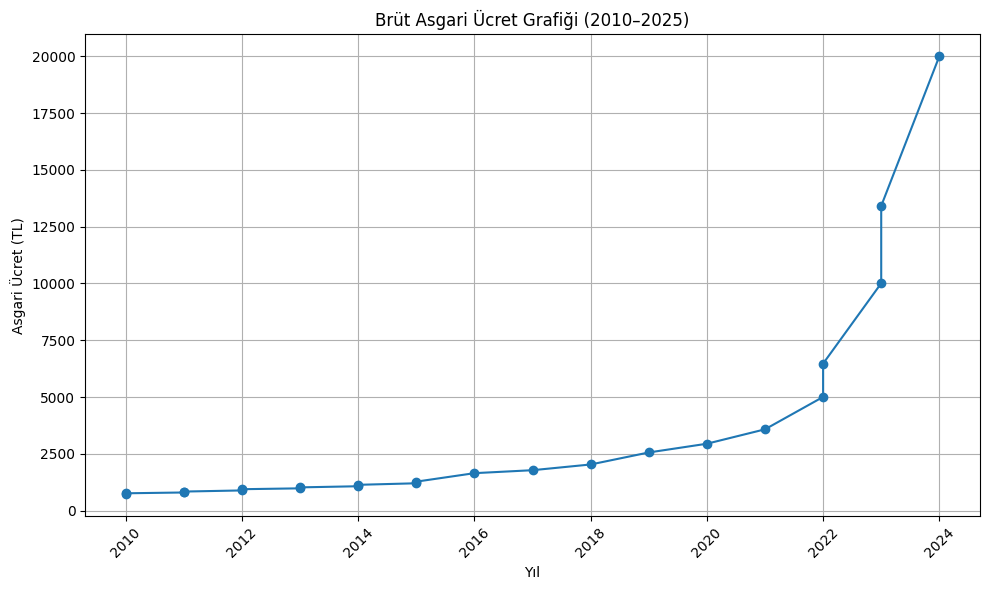

In [16]:
plt.figure(figsize=(10,6))
plt.plot(df['yıl'], df['ücret'], marker='o', linestyle='-')
plt.title('Brüt Asgari Ücret Grafiği (2010–2025)')
plt.xlabel('Yıl')
plt.ylabel('Asgari Ücret (TL)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Reel Asgari Ücret Hesaplaması (2010 Bazlı)

Bu bölümde, TÜFE verisi kullanılarak 2010 yılı baz alınarak reel (enflasyondan arındırılmış) brüt asgari ücret hesaplanmıştır.  
Formül:

**Reel Ücret = Nominal Ücret × (2010 TÜFE / İlgili Yılın TÜFE’si)**  
Bu sayede ücretlerin yıllar içindeki gerçek alım gücü karşılaştırmalı olarak analiz edilebilir.


In [34]:
df_ucret = pd.read_excel('/content/2.xlsx')
df_ucret.columns = df_ucret.columns.str.strip()
df_ucret['yıl'] = pd.to_datetime(df_ucret['yıl']).dt.year
df_ucret['yıl'] = df_ucret['yıl'].astype(int)

df_tufe = pd.read_excel('/content/3.xlsx')

df_tufe['yıl'] = df_tufe["Tüketici Fiyatları Endeksi (TÜFE)"].astype(str).str.extract("(\d{4})").astype(int)
df_tufe = df_tufe[['yıl', 'Tüketici Fiyatları Endeksi (TÜFE)_2']]
df_tufe.columns = ['yıl', 'tufe']
df_tufe['yıl'] = df_tufe['yıl'].astype(int)

baz_yil = 2010
tufe_baz = df_tufe.loc[df_tufe['yıl'] == baz_yil, 'tufe'].values[0]

df = pd.merge(df_ucret, df_tufe, on='yıl')
df['reel_ucret'] = df['ücret'] * (tufe_baz / df['tufe'])

display(df)


,yıl,ücret,tufe,reel_ucret
0,2024,20002.5,0.4438,2884.542587
1,2023,13414.5,0.6477,1325.502547
2,2023,10008.0,0.6477,988.902270
3,2022,6471.0,0.6427,644.381515
4,2022,5004.0,0.6427,498.297806
5,2021,3577.5,0.3608,634.589800
6,2020,2943.0,0.1460,1290.082192
7,2019,2558.4,0.1184,1382.918919
8,2018,2029.5,0.2030,639.842365
9,2017,1777.5,0.1192,954.362416


## 📊 Nominal ve Reel Asgari Ücret Karşılaştırması (2010–2025)

Bu grafik, 2010–2025 yılları arasında Türkiye'deki brüt asgari ücretin **nominal** (enflasyondan arındırılmamış) ve **reel** (2010 yılı TÜFE baz alınarak enflasyondan arındırılmış) değerlerini karşılaştırmaktadır.  
- **Nominal ücret** zamanla sürekli artış gösterirken,  
- **Reel ücret** alım gücünü temsil eder ve enflasyonun etkisini ortaya koyar.

Bu karşılaştırma, ücret artışlarının gerçek yaşam koşullarına yansımasını anlamak için kritik bir göstergedir.


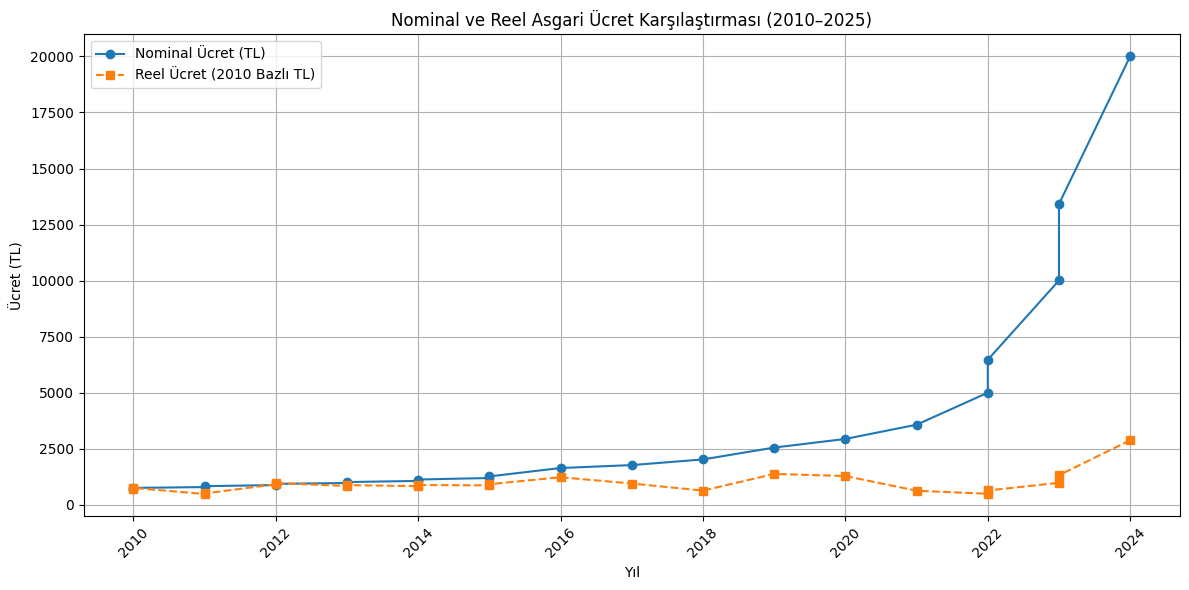

In [32]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.plot(df['yıl'], df['ücret'], marker='o', linestyle='-', label='Nominal Ücret (TL)')

plt.plot(df['yıl'], df['reel_ucret'], marker='s', linestyle='--', label='Reel Ücret (2010 Bazlı TL)')

plt.title('Nominal ve Reel Asgari Ücret Karşılaştırması (2010–2025)')
plt.xlabel('Yıl')
plt.ylabel('Ücret (TL)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## 💡 Yıllık Reel Ücret Değişimi ve Gerçek Alım Gücü

Bu bölümde, reel (enflasyondan arındırılmış) asgari ücretin yıllık yüzdesel değişimi hesaplanmıştır.  
Ayrıca nominal olarak zam yapılan ancak alım gücünün düştüğü yıllar belirlenmiştir.

- Reel ücret artışı %0'ın altında olan yıllarda, çalışanların alım gücü azalmıştır.
- Bazı yıllarda nominal ücret artsa da, yüksek enflasyon nedeniyle reel ücret düşüş göstermiştir.

Bu analiz, maaş politikalarının yalnızca rakamsal artışlarla değil, **gerçek satın alma gücü** üzerinden değerlendirilmesi gerektiğini göstermektedir.


In [37]:
df['reel_degisim_%'] = df['reel_ucret'].pct_change() * 100

In [43]:
df['nominal_fark'] = df['ücret'].diff()
df['reel_fark'] = df['reel_ucret'].diff()

df_reel_dusus = df[(df['nominal_fark'] > 0) & (df['reel_fark'] < 0)]

if df_reel_dusus.empty:
    print("🎉 Tüm yıllarda yapılan zamlar reel olarak da alım gücünü artırmış.")
else:
    display(df_reel_dusus[['yıl', 'ücret', 'reel_ucret', 'nominal_fark', 'reel_fark']])

🎉 Tüm yıllarda yapılan zamlar reel olarak da alım gücünü artırmış.


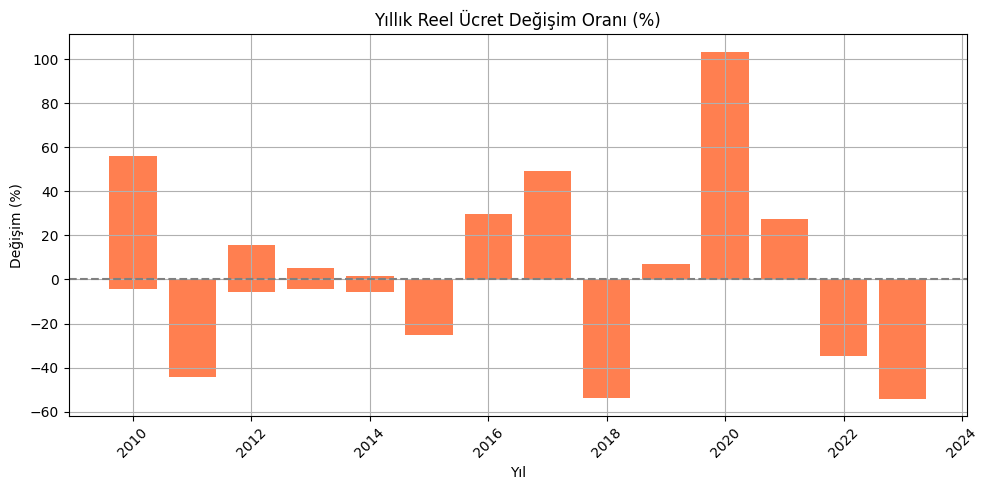

In [38]:
plt.figure(figsize=(10,5))
plt.bar(df['yıl'], df['reel_degisim_%'], color='coral')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Yıllık Reel Ücret Değişim Oranı (%)')
plt.xlabel('Yıl')
plt.ylabel('Değişim (%)')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## 📈 Asgari Ücretin Yıllara Göre Dolar Karşılığı (2010–2025)

Bu grafik, Türkiye'deki brüt asgari ücretin 2010–2025 yılları arasında Amerikan Doları ($) cinsinden karşılığını göstermektedir.  
Veriler, Türkiye Cumhuriyet Merkez Bankası'nın (TCMB) yıllık ortalama USD/TRY kuru baz alınarak hesaplanmıştır.

**Amaç**: Asgari ücretteki artışların gerçek değerini uluslararası ölçekte analiz edebilmek ve kur etkisini gözlemlemektir.

#### Öne Çıkan Bulgular:
- **Nominal artışlara rağmen**, kurun hızlı yükseldiği yıllarda **dolar bazlı ücretler gerilemiştir.**
- Örneğin, bazı yıllarda asgari ücret TL cinsinden artsa bile, dolar karşılığı **önceki yılın gerisinde kalmıştır.**
- 2025 tahmini dahil edildiğinde, dolar bazlı ücretin toparlanma eğiliminde olduğu görülmektedir.

Bu analiz, maaş politikalarının **sadece yerel enflasyona değil, döviz kuruna da ne derece bağlı olduğunu** gösteren çarpıcı bir göstergedir.


In [35]:
usd_kurlar = {
  2010: 1.5011, 2011: 1.6708, 2012: 1.7921, 2013: 1.9020,
  2014: 2.1881, 2015: 2.7209, 2016: 3.0223, 2017: 3.6491,
  2018: 4.8154, 2019: 5.6724, 2020: 7.0108, 2021: 8.9109,
  2022: 16.5744, 2023: 23.7957, 2024: 32.8132, 2025: 37.3830
}

df['usd_kur'] = df['yıl'].map(usd_kurlar)
df['usd_ucret'] = df['ücret'] / df['usd_kur']

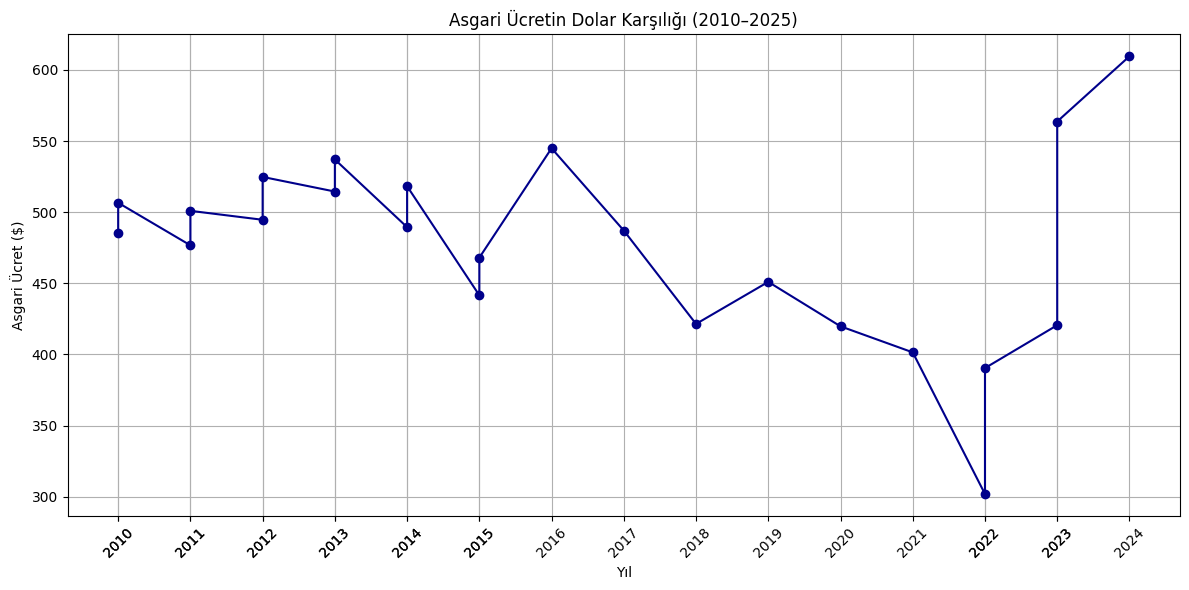

In [36]:
plt.figure(figsize=(12,6))
plt.plot(df['yıl'], df['usd_ucret'], marker='o', color='darkblue')
plt.title('Asgari Ücretin Dolar Karşılığı (2010–2025)')
plt.xlabel('Yıl')
plt.ylabel('Asgari Ücret ($)')
plt.grid(True)
plt.xticks(df['yıl'], rotation=45)
plt.tight_layout()
plt.show()